In [34]:
import pandas as pd
import numpy as np

from sklearn.datasets import fetch_openml

pd.options.plotting.backend = 'pandas_bokeh'

import pandas_bokeh
from bokeh.io import output_notebook
from bokeh.plotting import figure, show


In [35]:
X,y = fetch_openml("wine", version=1, as_frame=True, return_X_y=True)
data = pd.concat([X,y], axis=1)
data.head()

,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280%2FOD315_of_diluted_wines,Proline,class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,1
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,1
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,1
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,1
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,1


In [36]:
data['class'].value_counts()

2    71
1    59
3    48
Name: class, dtype: int64

In [37]:
data.dtypes

Alcohol                            float64
Malic_acid                         float64
Ash                                float64
Alcalinity_of_ash                  float64
Magnesium                          float64
Total_phenols                      float64
Flavanoids                         float64
Nonflavanoid_phenols               float64
Proanthocyanins                    float64
Color_intensity                    float64
Hue                                float64
OD280%2FOD315_of_diluted_wines     float64
Proline                            float64
class                             category
dtype: object

In [38]:
data.corr()

,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280%2FOD315_of_diluted_wines,Proline
Alcohol,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720
Malic_acid,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011
Ash,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626
Alcalinity_of_ash,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597
Magnesium,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351
Total_phenols,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115
Flavanoids,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193
Nonflavanoid_phenols,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385
Proanthocyanins,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417
Color_intensity,0.546364,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100


In [39]:
pd.options.plotting.backend = 'pandas_bokeh'

import pandas_bokeh
from bokeh.io import output_notebook
from bokeh.plotting import figure, show

output_notebook()
p1 = data.plot_bokeh.scatter(x='Hue', 
                              y='Proline', 
                              category='class', 
                              title='Proline and Hue by wine class',
                              show_figure=False)
show(p1)


Loading BokehJS ...

In [40]:
output_notebook()

p1 = data.plot_bokeh.scatter(x='Hue', 
                              y='Proline', 
                              category='class', 
                              title='Proline and Hue by wine class',
                              show_figure=False)

p2 = data[['Hue','class']].groupby(['class']).mean().plot.bar(title='Mean Hue per Class')

df_hue = pd.DataFrame({
    'class_1': data[data['class'] == '1']['Hue'],
    'class_2': data[data['class'] == '2']['Hue'],
    'class_3': data[data['class'] == '3']['Hue']},
    columns=['class_1', 'class_2', 'class_3'])

p3 = df_hue.plot_bokeh.hist(title='Distribution per Class: Hue')

df_proline = pd.DataFrame({
    'class_1': data[data['class'] == '1']['Proline'],
    'class_2': data[data['class'] == '2']['Proline'],
    'class_3': data[data['class'] == '3']['Proline']},
    columns=['class_1', 'class_2', 'class_3'])

p4 = df_proline.plot_bokeh.hist(title='Distribution per Class: Proline')

pandas_bokeh.plot_grid([[p1, p2], 
                        [p3, p4]], plot_width=450)


Loading BokehJS ...

/Users/rebecca.vickery/.local/share/virtualenvs/machine-learning-tutorials-_Dz45n0p/lib/python3.7/site-packages/pandas_bokeh/plot.py:790: Warning: There are NaN values in column 'class_1'. For the histogram, these rows have been neglected.
  Warning,
/Users/rebecca.vickery/.local/share/virtualenvs/machine-learning-tutorials-_Dz45n0p/lib/python3.7/site-packages/pandas_bokeh/plot.py:790: Warning: There are NaN values in column 'class_2'. For the histogram, these rows have been neglected.
  Warning,
/Users/rebecca.vickery/.local/share/virtualenvs/machine-learning-tutorials-_Dz45n0p/lib/python3.7/site-packages/pandas_bokeh/plot.py:790: Warning: There are NaN values in column 'class_3'. For the histogram, these rows have been neglected.
  Warning,


Column(id='18060', ...)

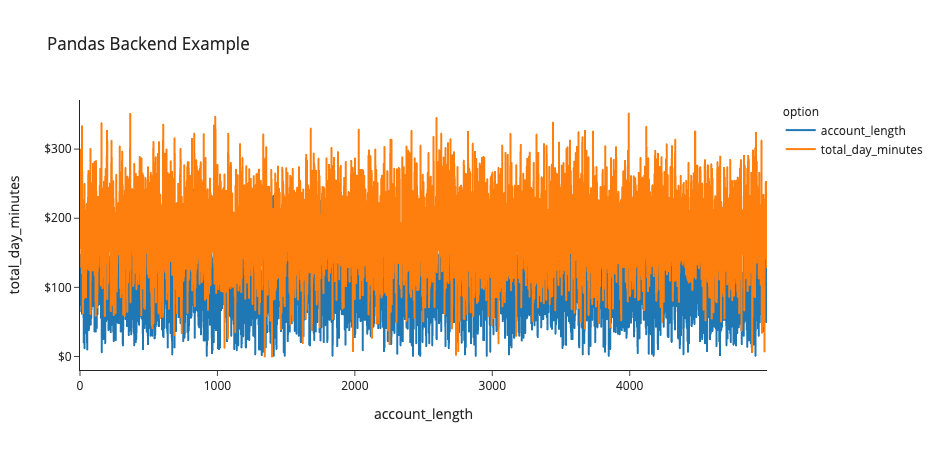

In [30]:
fig = data[['account_length', 'total_day_minutes']].plot(title="Pandas Backend Example", template="simple_white",
              labels=dict(index="account_length", value="total_day_minutes", variable="option"))
fig.update_yaxes(tickprefix="$")
fig.show()

In [19]:
from bokeh.io import output_file, show
from bokeh.layouts import gridplot
from bokeh.plotting import figure

output_file("panning_2.html")

p1 = data[['Alcohol', 'Proline']].plot.scatter(y='Alcohol', x='Proline')
#tab1 = Panel(child=p1, title="scatter")

p2 = data[['Alcohol', 'Proline']].plot.line(y='Alcohol', x='Proline')
#tab2 = Panel(child=p2, title="line")

p = gridplot([[p1, p2]], toolbar_location=None)

show(p)

RuntimeError: Models must be owned by only a single document, BasicTicker(id='3580', ...) is already in a doc